In [1]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric
from sklearn.preprocessing import StandardScaler

In [25]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
inpDir = Path('..') / '..' / 'input'
# outDir = '../output'
outDir = Path('..') / 'output'


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE)

TEST_SIZE  = 0.2 # Size of test data
NOISE = 0.2
EPOCHS = 20000
ALPHA = 0.1
N_SAMPLE  = 1000


# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [26]:
def fn_plot_decision_boundary(X: np.ndarray,y: np.ndarray, model:dict, predict):
    """
    Plots the decision boundary for a classification model along with the data points.
    
    Args:
        X (np.ndarray): Input feature matrix with shape (n_samples, 3)
        wts (np.ndarray): Weights matrix
        pred_function: Function to predict using weights and datapoints
    """
    
    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots( figsize=(8, 5) )
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.05
    padding = 2 * dm
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # Add a column of ones to the coordinate array for the bias term
    
    # List to collect predictions for each point in the mesh grid
    y_pred = predict(model,XX)
    Z = np.array(y_pred).reshape(xx.shape)
    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.bwr)
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')  
    ax.set_ylabel('B') 
    
    # Display the final plot
    plt.show()

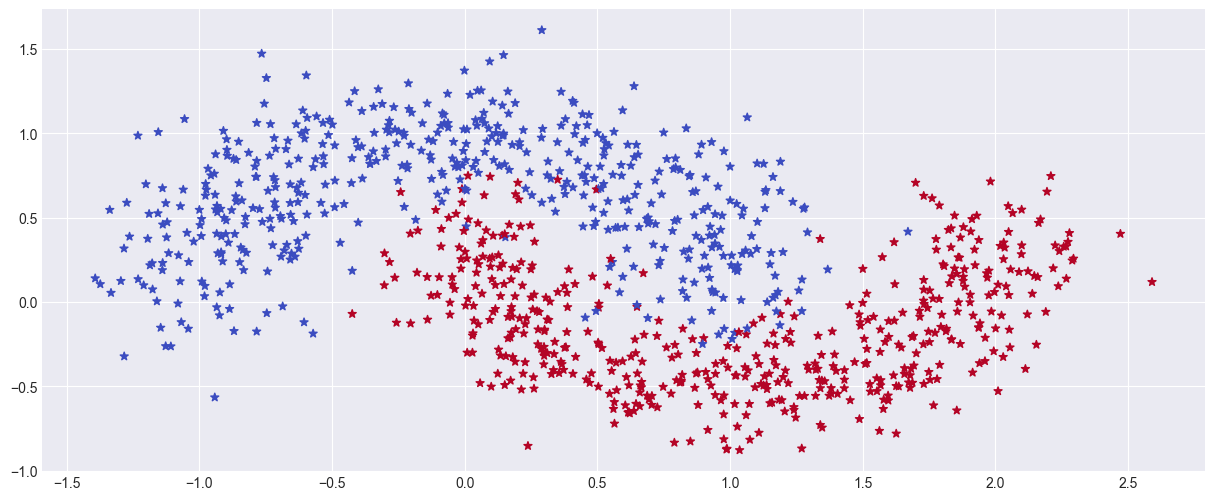

In [27]:
X,y  = make_moons(n_samples=N_SAMPLE,noise=NOISE,random_state=RANDOM_STATE,shuffle=True)
pd.get_dummies(y).to_numpy()

plt.scatter(X[:,0],X[:,1],c=y,cmap= CMAP,marker='*')


In [5]:
data_df = pd.DataFrame(X,columns=['A','B'])
data_df['target'] = y


In [6]:
y = pd.get_dummies(y).to_numpy()

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=TEST_SIZE,random_state=RANDOM_STATE)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

loss_hist = {}
param =  {}
param['h_dim'] = [X_train.shape[1],5,5,4,3,y_train.shape[1]]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [8]:
data_train,data_test  = data_df.to_numpy()[:900],data_df.to_numpy()[900:]
data_train.shape,data_test.shape

((900, 3), (100, 3))

In [9]:
def fn_softmax(z):
    exp_score = np.exp(z)
    return exp_score / np.sum(exp_score,axis=1,keepdims=True)

In [10]:
def fn_sigmoid(z: np.ndarray) -> float:
    return 1 / (1 + np.exp(-z))

In [11]:
def fn_activ(z):
    return np.tanh(z)
def fn_activ_prime(z):
    return 1.0 - np.tanh(z)**2

In [12]:
fn_activ(np.asarray([[-1.0,0,1.0]]))

array([[-0.76159416,  0.        ,  0.76159416]])

In [13]:
		
# # def predict(model, X):
# #     W1 = model['W1']
# #     W2 = model['W2']
# #     W3 = model['W3']
# #     W4 = model['W4']
# #     W5 = model['W5']
    
# #     b1 = model['b1']
# #     b2 = model['b2']
# #     b3 = model['b3']
# #     b4 = model['b4']
# #     b5 = model['b5']
    
# #     #Forward propgation - 
# #     z1 = X.dot(W1) + b1 #aggregation
# #     a1 = fn_active(z1) #activation

# #     z2 = a1.dot(W2) + b2 #aggregation
# #     a2 = fn_active(z2) #activation
    
# #     z3 = a2.dot(W3) + b3 #aggregation
# #     a3 = fn_active(z3) #activation
    
# #     z4 = a3.dot(W4) + b4 #aggregation
# #     a4 = fn_active(z4) #activation
    
    
# #     z5 = a4.dot(W5) + b5
# #     a5 = fn_softmax(z5)
    
# #     return a5.argmax(axis = 1)
# def predict(model, X_p):
#     w1 = model['W1']
#     w2 = model['W2']
#     w3 = model['W3']
#     w4 = model['W4']
#     w5 = model['W5']
   

#     b1 = model['b1']
#     b2 = model['b2']
#     b3 = model['b3']
#     b4 = model['b4']
#     b5 = model['b5']

#     z1 = X_p.dot(w1) + b1  # aggregation
#     a1 = fn_active(z1)  # activation

#     # layer op
#     z2 = a1.dot(w2) + b2  # aggregation
#     a2 = fn_active(z2)  # activation


#     z3 = a2.dot(w3) + b3  # aggregation
#     a3 = fn_active(z3)  # activation

#     z4 = a3.dot(w4) + b4  # aggregation
#     a4 = fn_active(z4)  # activation

#     z5 = a4.dot(w5) + b5  # aggregation
#     a5 = fn_softmax(z5)

#     return a5.argmax(axis=1)


In [14]:
		
# # def calculate_loss(model, X,y):
# #     W1 = model['W1']
# #     W2 = model['W2']
# #     W3 = model['W3']
# #     W4 = model['W4']
# #     W5 = model['W5']
    
# #     b1 = model['b1']
# #     b2 = model['b2']
# #     b3 = model['b3']
# #     b4 = model['b4']
# #     b5 = model['b5']
# #     m = X.shape[0]
# #     #Forward propgation - 
# #     z1 = X.dot(W1) + b1 #aggregation
# #     a1 = fn_active(z1) #activation

# #     z2 = a1.dot(W2) + b2 #aggregation
# #     a2 = fn_active(z2) #activation
    
# #     z3 = a2.dot(W3) + b3 #aggregation
# #     a3 = fn_active(z3) #activation
    
# #     z4 = a3.dot(W4) + b4 #aggregation
# #     a4 = fn_active(z4) #activation
    
    
# #     z5 = a4.dot(W5) + b5
# #     a5 = fn_softmax(z5)
# #     data_loss = -(y * np.log(a5) + (1-y)*np.log(1-a5)).sum()
# #     return data_loss/m
# def calculate_loss(model, X_l, y_l):
#     w1 = model['W1']
#     w2 = model['W2']
#     w3 = model['W3']
#     w4 = model['W4']
#     w5 = model['W5']
   

#     b1 = model['b1']
#     b2 = model['b2']
#     b3 = model['b3']
#     b4 = model['b4']
#     b5 = model['b5']
# #
#     m = X_l.shape[0]
    
#     z1 = X_l.dot(w1) + b1  # aggregation
#     a1 = fn_active(z1)  # activation

#     # layer op
#     z2 = a1.dot(w2) + b2  # aggregation
#     a2 = fn_active(z2)  # activation


#     z3 = a2.dot(w3) + b3  # aggregation
#     a3 = fn_active(z3)  # activation

#     z4 = a3.dot(w4) + b4  # aggregation
#     a4 = fn_active(z4)  # activation

#     z5 = a4.dot(w5) + b5  # aggregation
#     a5 = fn_softmax(z5)  # activation

#     data_loss = -(y_l * np.log(a5) + (1-y_l) * np.log(1-a5)).sum()
    
#     return data_loss / m

    

In [15]:
    

# def build_model(param,X_tr,y_tr,X_ts,y_ts,alpha,n_epoch):
#     m = X_tr.shape[0]
#     nn_output_dim = y.shape[1]
   
#     W1 = rng.random((param['h_dim'][0],param['h_dim'][1])) / np.sqrt(param['h_dim'][0]) #initialize random weights 
#     W2 = rng.random((param['h_dim'][1],param['h_dim'][2])) / np.sqrt(param['h_dim'][1]) #initialize random weights 
#     W3 = rng.random((param['h_dim'][2],param['h_dim'][3])) / np.sqrt(param['h_dim'][2]) #initialize random weights 
#     W4 = rng.random((param['h_dim'][3],param['h_dim'][4])) / np.sqrt(param['h_dim'][3]) #initialize random weights 
#     W5 = rng.random((param['h_dim'][4],param['h_dim'][5])) / np.sqrt(param['h_dim'][4]) #initialize random weights 
    
#     b1 = np.zeros((1,param['h_dim'][1]))
#     b2 = np.zeros((1,param['h_dim'][2]))
#     b3 = np.zeros((1,param['h_dim'][3]))
#     b4 = np.zeros((1,param['h_dim'][4]))
#     b5 = np.zeros((1,param['h_dim'][5]))

#     loss,tloss,epoch = [],[],[]
    
#     print(W2)
#     for i in range(n_epoch):
#         #Forward propgation - 
#         z1 = X_tr.dot(W1) + b1 #aggregation
#         a1 = fn_active(z1) #activation

#         z2 = a1.dot(W2) + b2 #aggregation
#         a2 = fn_active(z2) #activation

#         z3 = a2.dot(W3) + b3 #aggregation
#         a3 = fn_active(z3) #activation
        
#         z4 = a3.dot(W4) + b4 #aggregation
#         a4 = fn_active(z4) #activation

        
#         z5 = a4.dot(W5) + b5
#         a5 = fn_sigmoid(z5)
        
        
#         #Back propogation - 
        
#         #layer 5
#         dz5 = a5 - y_tr
#         assert(z5.shape == dz5.shape), f'Shape z5, {z5.shape} , {dz5.shape}'
#         dW5 = (a4.T).dot(dz5)
#         assert(W5.shape == dW5.shape), f'Shape z5, {W5.shape} , {dW5.shape}'
#         db5 = np.sum(dz5,axis = 0,keepdims=True)
#         assert(b5.shape == db5.shape), f'Shape z5, {b5.shape} , {db5.shape}'
#         da4 = dz5.dot(W5.T)
#         assert(a4.shape == da4.shape), f'Shape z5, {a4.shape} , {da4.shape}'

        
#         #layer 4
#         dz4 = a4 - fn_active_prime(z4)
#         assert(z4.shape == dz4.shape), f'Shape z4, {z4.shape} , {dz4.shape}'
#         dW4 = (a3.T).dot(dz4)
#         assert(W4.shape == dW4.shape), f'Shape z4, {W4.shape} , {dW4.shape}'
#         db4 = np.sum(dz4,axis = 0,keepdims=True)
#         assert(b4.shape == db4.shape), f'Shape z4, {b4.shape} , {db4.shape}'
#         da3 = dz4.dot(W4.T)
#         assert(a3.shape == da3.shape), f'Shape z4, {a3.shape} , {da3.shape}'

#          #layer 3
#         dz3 = a3 - fn_active_prime(z3)
#         assert(z3.shape == dz3.shape), f'Shape z3, {z3.shape} , {dz3.shape}'
#         dW3 = (a2.T).dot(dz3)
#         assert(W3.shape == dW3.shape), f'Shape z3, {W3.shape} , {dW3.shape}'
#         db3 = np.sum(dz3,axis = 0,keepdims=True)
#         assert(b3.shape == db3.shape), f'Shape z3, {b3.shape} , {db3.shape}'
#         da2 = dz3.dot(W3.T)
#         assert(a2.shape == da2.shape), f'Shape z3, {a2.shape} , {da2.shape}'


#         #layer 2
#         dz2 = a2 - fn_active_prime(z2)
#         assert(z2.shape == dz2.shape), f'Shape z2, {z2.shape} , {dz2.shape}'
#         dW2 = (a1.T).dot(dz2)
#         assert(W2.shape == dW2.shape), f'Shape z2, {W2.shape} , {dW2.shape}'
#         db2 = np.sum(dz2,axis = 0,keepdims=True)
#         assert(b2.shape == db2.shape), f'Shape z2, {b2.shape} , {db2.shape}'
#         da1 = dz2.dot(W2.T)
#         assert(a1.shape == da1.shape), f'Shape z2, {a1.shape} , {da1.shape}'
        
#         #layer 1
#         dz1 = da1 * fn_active_prime(z1)
#         assert(z1.shape == dz1.shape), f'Shape z2, {z1.shape} , {dz1.shape}'
#         dW1 = (X_tr.T).dot(dz1)
#         assert(W1.shape == dW1.shape), f'Shape z2, {W1.shape} , {dW1.shape}'
#         db1 = np.sum(dz1,axis = 0,keepdims=True)
#         assert(b1.shape == db1.shape), f'Shape z2, {b1.shape} , {db1.shape}'

#         #upldating wieghts and bias for optimization
#         W1 = W1 - alpha*dW1/m
#         W2 = W2 - alpha*dW2/m
#         W3 = W3 - alpha*dW3/m
#         W4 = W4 - alpha*dW4/m
#         W5 = W5 - alpha*dW5/m
        
#         b1 = b1 - alpha*db1/m
#         b2 = b2 - alpha*db2/m
#         b3 = b3 - alpha*db3/m
#         b4 = b4 - alpha*db4/m
#         b5 = b5 - alpha*db5/m

        
#         model = {'W1' : W1,'b1' : b1,
#                  'W2' : W2,'b2' : b2,
#                  'W3' : W3,'b3' : b3,
#                  'W4' : W4,'b4' : b4,
#                  'W5' : W5,'b5' : b5,
#                 }
#         if  i%100 == 0:
#             curr_loss = calculate_loss(model,X_tr,y_tr)
#             curr_ts_loss = calculate_loss(model,X_ts,y_ts)
#             epoch.append(i)
#             loss.append(curr_loss)
#             tloss.append(curr_ts_loss)
            
#             print(f'epoch - {i} : Loss - {curr_loss}')
#     loss_hist['epoch'] = epoch
#     loss_hist['loss'] = loss
#     loss_hist['tloss'] = tloss
#     return model

In [29]:


loss_hist

def calculate_loss(model, X_l, y_l):
    w1 = model['W1']
    w2 = model['W2']
    w3 = model['W3']
    w4 = model['W4']
    w5 = model['W5']
   

    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    b4 = model['b4']
    b5 = model['b5']

    m = X_l.shape[0]
    
    z1 = X_l.dot(w1) + b1  # aggregation
    a1 = fn_activ(z1)  # activation

    # layer op
    z2 = a1.dot(w2) + b2  # aggregation
    a2 = fn_activ(z2)  # activation


    z3 = a2.dot(w3) + b3  # aggregation
    a3 = fn_activ(z3)  # activation

    z4 = a3.dot(w4) + b4  # aggregation
    a4 = fn_activ(z4)  # activation

    z5 = a4.dot(w5) + b5  # aggregation
    a5 = fn_softmax(z5)  # activation

    data_loss = -(y_l * np.log(a5) + (1-y_l) * np.log(1-a5)).sum()
    
    return data_loss / m

    




def predict(model, X_p):
    w1 = model['W1']
    w2 = model['W2']
    w3 = model['W3']
    w4 = model['W4']
    w5 = model['W5']
   

    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    b4 = model['b4']
    b5 = model['b5']

    z1 = X_p.dot(w1) + b1  # aggregation
    a1 = fn_activ(z1)  # activation

    # layer op
    z2 = a1.dot(w2) + b2  # aggregation
    a2 = fn_activ(z2)  # activation


    z3 = a2.dot(w3) + b3  # aggregation
    a3 = fn_activ(z3)  # activation

    z4 = a3.dot(w4) + b4  # aggregation
    a4 = fn_activ(z4)  # activation

    z5 = a4.dot(w5) + b5  # aggregation
    a5 = fn_softmax(z5)

    return a5.argmax(axis=1)
    
    
    
    
    
    
    
    
    
def build_model(param,X_tr,y_tr,X_ts,y_ts,alpha, n_epochs):
    m = X_tr.shape[0]
    # nn_output_dim = y.shape[1]
    w1 = rng.random((param['h_dim'][0], param['h_dim'][1])) / np.sqrt(param['h_dim'][0])
    w2 =  rng.random((param['h_dim'][1], param['h_dim'][2])) / np.sqrt(param['h_dim'][1])
    w3 =  rng.random((param['h_dim'][2], param['h_dim'][3])) / np.sqrt(param['h_dim'][2])
    w4 =  rng.random((param['h_dim'][3], param['h_dim'][4])) / np.sqrt(param['h_dim'][3])
    w5 =  rng.random((param['h_dim'][4], param['h_dim'][5])) / np.sqrt(param['h_dim'][4])


    b1 = np.zeros((1, param['h_dim'][1]))
    b2 = np.zeros((1, param['h_dim'][2]))
    b3 = np.zeros((1, param['h_dim'][3]))
    b4 = np.zeros((1, param['h_dim'][4]))
    b5 = np.zeros((1, param['h_dim'][5]))

    loss,tloss, epoch = [], [], []
    model = {"W1": w1,
                "W2": w2,
                "B1": b1,
                "B2": b2}
    for i in range(n_epochs):
        ## Forward prop

        # layer hidden
        z1 = X_tr.dot(w1) + b1  # aggregation
        a1 = fn_activ(z1)  # activation

        # layer op
        z2 = a1.dot(w2) + b2  # aggregation
        a2 = fn_activ(z2)  # activation


        z3 = a2.dot(w3) + b3  # aggregation
        a3 = fn_activ(z3)  # activation

        z4 = a3.dot(w4) + b4  # aggregation
        a4 = fn_activ(z4)  # activation

        z5 = a4.dot(w5) + b5  # aggregation
        a5 = fn_softmax(z5)  # activation

        ## Back_propogation
        # layer 5       
        dz5 = a5 - y_tr
        assert(z5.shape == dz5.shape), f'Shape z5  : {z5.shape} , {dz5.shape}'

        dw5 = (a4.T).dot(dz5)
        assert(w5.shape == dw5.shape), f'Shape w5  : {w5.shape} , {dw5.shape}'

        db5 = np.sum(dz5, axis=0, keepdims=True)
        assert(b5.shape == db5.shape), f'Shape b5  : {b5.shape} , {db5.shape}'

        da4 = dz5.dot(w5.T)
        assert(a4.shape == da4.shape), f'Shape a4  : {a4.shape} , {da4.shape}'


        # layer 4       
        dz4 = da4 * fn_activ_prime(z4)
        assert(z4.shape == dz4.shape), f'Shape z4  : {z4.shape} , {dz4.shape}'

        dw4 = (a3.T).dot(dz4)
        assert(w4.shape == dw4.shape), f'Shape w4  : {w4.shape} , {dw4.shape}'

        db4 = np.sum(dz4, axis=0, keepdims=True)
        assert(b4.shape == db4.shape), f'Shape b4  : {b4.shape} , {db4.shape}'

        da3 = dz4.dot(w4.T)
        assert(a3.shape == da3.shape), f'Shape a4  : {a3.shape} , {da3.shape}'



        # layer 3       
        dz3 = da3 * fn_activ_prime(z3)
        assert(z3.shape == dz3.shape), f'Shape z3  : {z3.shape} , {dz3.shape}'

        dw3 = (a2.T).dot(dz3)
        assert(w3.shape == dw3.shape), f'Shape w3  : {w3.shape} , {dw3.shape}'

        db3 = np.sum(dz3, axis=0, keepdims=True)
        assert(b3.shape == db3.shape), f'Shape b3  : {b3.shape} , {db3.shape}'

        da2 = dz3.dot(w3.T)
        assert(a2.shape == da2.shape), f'Shape a2  : {a2.shape} , {da2.shape}'


        # layer 2       
        dz2 = da2 * fn_activ_prime(z2)
        assert(z2.shape == dz2.shape), f'Shape z2  : {z2.shape} , {dz2.shape}'

        dw2 = (a1.T).dot(dz2)
        assert(w2.shape == dw2.shape), f'Shape w3  : {w2.shape} , {dw2.shape}'

        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert(b2.shape == db2.shape), f'Shape b3  : {b2.shape} , {db2.shape}'

        da1 = dz2.dot(w2.T)
        assert(a1.shape == da1.shape), f'Shape a2  : {a1.shape} , {da1.shape}'

        # layer1
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'Shape z1  : {z1.shape} , {dz1.shape}'
        dw1 = (X_tr.T).dot(dz1)
        assert(dw1.shape == w1.shape), f'Shape dw1  : {w1.shape} , {dw1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert(db1.shape == b1.shape), f'Shape db1 : {db1.shape} , {b1.shape}'

        # Parameter updates
        w1 -= (alpha * dw1 / m)
        b1 -= (alpha * db1 / m)
        w2 -= (alpha * dw2 / m)
        b2 -= (alpha * db2 / m)
        w3 -= (alpha * dw3 / m)
        b3 -= (alpha * db3 / m)
        w4 -= (alpha * dw4 / m)
        b4 -= (alpha * db4 / m)
        w5 -= (alpha * dw5 / m)
        b5 -= (alpha * db5 / m)

        model = {"W1": w1,'b1':b1,
                 "W2": w2,'b2':b2,
                 "W3": w3,'b3':b3,
                 "W4": w4,'b4':b4,
                 "W5": w5,'b5':b5,
                 }
        

        cur_loss = calculate_loss(model, X_tr, y_tr)
        curr_ts_loss = calculate_loss(model,X_ts,y_ts)
        epoch.append(i)
        loss.append(cur_loss)
        tloss.append(curr_ts_loss)

        if not i % 1000 == 0:
            
            print(f"epoch - {i} : Loss - {cur_loss:.4f}")

    loss_hist['epoch'] = epoch
    loss_hist["loss"] = loss
    loss_hist["test_loss"] = tloss
    
    return model

In [30]:
model = build_model(param,
            X_train,
            y_train,
            X_test,
            y_test,
            alpha = ALPHA,
            n_epochs = EPOCHS)

epoch - 1 : Loss - 1.4001
epoch - 2 : Loss - 1.3975
epoch - 3 : Loss - 1.3952
epoch - 4 : Loss - 1.3931
epoch - 5 : Loss - 1.3913
epoch - 6 : Loss - 1.3896
epoch - 7 : Loss - 1.3880
epoch - 8 : Loss - 1.3867
epoch - 9 : Loss - 1.3854
epoch - 10 : Loss - 1.3842
epoch - 11 : Loss - 1.3831
epoch - 12 : Loss - 1.3820
epoch - 13 : Loss - 1.3810
epoch - 14 : Loss - 1.3801
epoch - 15 : Loss - 1.3791
epoch - 16 : Loss - 1.3782
epoch - 17 : Loss - 1.3774
epoch - 18 : Loss - 1.3765
epoch - 19 : Loss - 1.3756
epoch - 20 : Loss - 1.3747
epoch - 21 : Loss - 1.3738
epoch - 22 : Loss - 1.3729
epoch - 23 : Loss - 1.3720
epoch - 24 : Loss - 1.3710
epoch - 25 : Loss - 1.3700
epoch - 26 : Loss - 1.3690
epoch - 27 : Loss - 1.3679
epoch - 28 : Loss - 1.3668
epoch - 29 : Loss - 1.3656
epoch - 30 : Loss - 1.3644
epoch - 31 : Loss - 1.3631
epoch - 32 : Loss - 1.3617
epoch - 33 : Loss - 1.3603
epoch - 34 : Loss - 1.3588
epoch - 35 : Loss - 1.3572
epoch - 36 : Loss - 1.3555
epoch - 37 : Loss - 1.3537
epoch - 38

In [32]:

loss_df = pd.DataFrame(loss_hist)

<Axes: xlabel='epoch'>

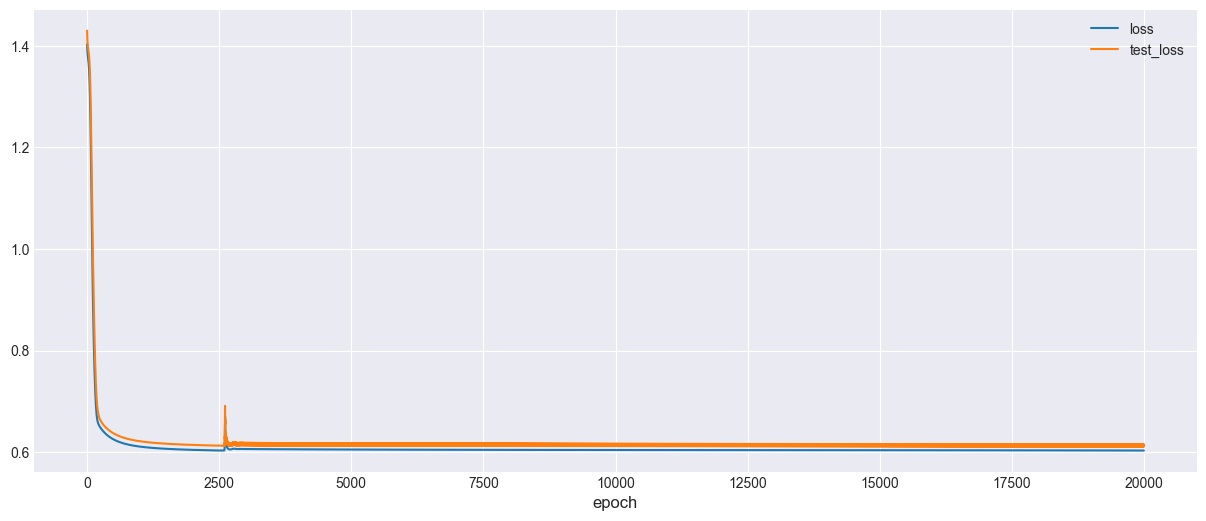

In [33]:
loss_df.plot(x = 'epoch' ,y = ['loss','test_loss'])



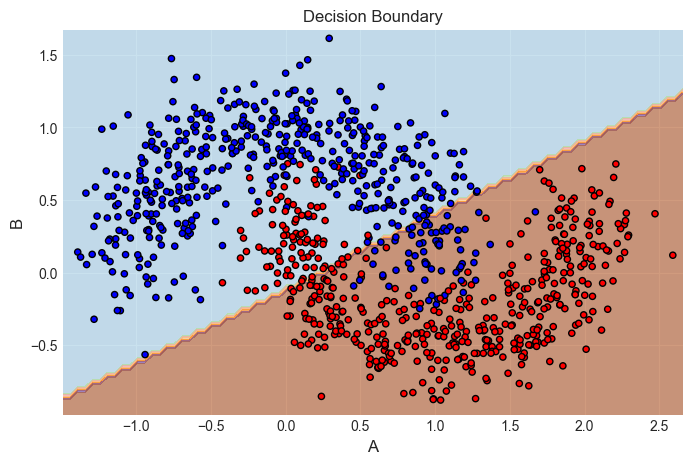

In [35]:
fn_plot_decision_boundary(X,data_df['target'],model,predict)

In [45]:
y_pred = predict(model,X_train)
y_pred.shape,y_train.shape

((800,), (800, 2))

In [44]:
print(classification_report(y_train.argmax(axis = 1),y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       400
           1       0.87      0.85      0.86       400

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



Text(0.5, 1.0, 'F1_score :0.8624785122675418')

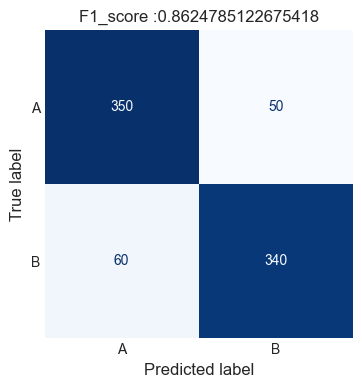

In [47]:
cm = confusion_matrix(y_train.argmax(axis = 1),y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['A','B'])

fig,ax = plt.subplots(figsize = (4,4))
disp.plot(ax = ax, cmap = 'Blues',colorbar = False)
ax.grid(False)
ax.set_title(f'F1_score :{f1_score(y_train.argmax(axis = 1),y_pred,average='weighted')}')